# Data Augmentation

In [5]:
%matplotlib notebook

In [6]:
import sqlite3
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [30]:
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest
from scipy.stats import jarque_bera

In [2]:
d_ini = dt.datetime(2017,1,1)
d_fin = dt.datetime(2018,1,1)

In [3]:
db_name = "data/data_accidentes.sqlite3"
conn = sqlite3.connect(db_name)
query = f"""SELECT *
            FROM info
            WHERE
            TW >= '{d_ini}' AND
            TW <= '{d_fin}' """
data = pd.read_sql_query(query,conn)
data['TW'] = pd.to_datetime(data['TW'])

In [4]:
data.columns

Index(['TW', 'BARRIO', 'icon', 'precipIntensity', 'precipProbability',
       'temperature', 'apparentTemperature', 'dewPoint', 'humidity',
       'windSpeed', 'cloudCover', 'uvIndex', 'visibility', 'Accidente'],
      dtype='object')

# Tratamiento como serie de tiempo

Vamos a verificar si las series de tiempo son estacionarias para asi obtener sus propiedades

In [51]:
from statsmodels.tsa.stattools import adfuller

<IPython.core.display.Javascript object>


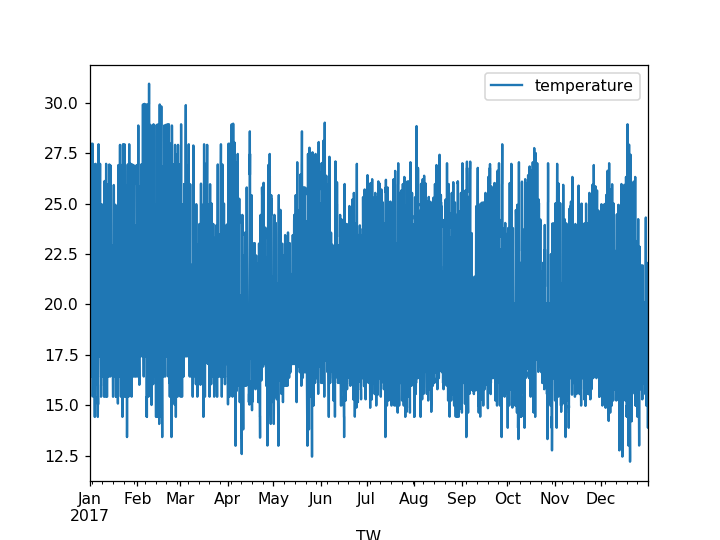

In [57]:
plt.plot('serie')
data[data['BARRIO']==data['BARRIO'].unique()[0]].plot(x = 'TW', y = 'temperature')

In [66]:
alpha = 0.05
for i in range(312):
    vp = adfuller(data[data['BARRIO']==data['BARRIO'].unique()[0]]['temperature'])[1]
    if alpha < vp:
        print('No es estacionario')

In [67]:
alpha = 0.05
for i in range(312):
    vp = adfuller(data[data['BARRIO']==data['BARRIO'].unique()[0]]['precipIntensity'])[1]
    if alpha < vp:
        print('No es estacionario')

In [68]:
alpha = 0.05
for i in range(312):
    vp = adfuller(data[data['BARRIO']==data['BARRIO'].unique()[0]]['apparentTemperature'])[1]
    if alpha < vp:
        print('No es estacionario')

In [69]:
alpha = 0.05
for i in range(312):
    vp = adfuller(data[data['BARRIO']==data['BARRIO'].unique()[0]]['dewPoint'])[1]
    if alpha < vp:
        print('No es estacionario')

In [70]:
alpha = 0.05
for i in range(312):
    vp = adfuller(data[data['BARRIO']==data['BARRIO'].unique()[0]]['humidity'])[1]
    if alpha < vp:
        print('No es estacionario')

In [71]:
alpha = 0.05
for i in range(312):
    vp = adfuller(data[data['BARRIO']==data['BARRIO'].unique()[0]]['windSpeed'])[1]
    if alpha < vp:
        print('No es estacionario')

In [72]:
alpha = 0.05
for i in range(312):
    vp = adfuller(data[data['BARRIO']==data['BARRIO'].unique()[0]]['cloudCover'])[1]
    if alpha < vp:
        print('No es estacionario')

In [73]:
alpha = 0.05
for i in range(312):
    vp = adfuller(data[data['BARRIO']==data['BARRIO'].unique()[0]]['visibility'])[1]
    if alpha < vp:
        print('No es estacionario')

In [77]:
freq = '10H'
variables = ['temperature','precipIntensity','apparentTemperature','dewPoint','humidity','windSpeed','cloudCover','visibility']

In [ ]:
data_aux = data.copy()
data_aux.index = data_aux.TW
data_aux = data_aux.drop(columns = 'TW')
resample_data = data_aux[variables].rolling(freq, closed = 'left').mean()
#resample_data = data_aux[vars].resample('1H').agg('mean').rolling(freq, closed = 'left').median()

In [79]:
data_aux = data.copy()
data_aux.index = data_aux.TW
data_aux = data_aux.drop(columns = 'TW')

In [88]:
data_pivot = data_aux.pivot_table(values=variables, index='TW',columns='BARRIO', aggfunc=sum)

In [100]:
data_mean = data_pivot.rolling(freq, closed = 'left').mean().stack().reset_index(drop = False)
data_var = data_pivot.rolling(freq, closed = 'left').var().stack().reset_index(drop = False)
data_median = data_pivot.rolling(freq, closed = 'left').median().stack().reset_index(drop = False)

col_means = [*data_mean.columns[:2]]
col_var = [*data_mean.columns[:2]]
col_median = [*data_mean.columns[:2]]
for col in data_mean.columns[2:]:
    col_means.append(col + '_mean')
    col_var.append(col + '_var')
    col_median.append(col + '_median')
    
data_mean.columns = col_means
data_var.columns = col_var
data_median.columns = col_median

In [105]:
data[['TW','BARRIO','icon','precipProbability','uvIndex','Accidente']]

,TW,BARRIO,icon,precipProbability,uvIndex,Accidente
0,2017-01-01 00:00:00,AguasFrias,partly-cloudy-night,0.0,0.0,0.0
1,2017-01-01 01:00:00,AguasFrias,partly-cloudy-night,0.0,0.0,0.0
2,2017-01-01 02:00:00,AguasFrias,fog,0.0,0.0,0.0
3,2017-01-01 03:00:00,AguasFrias,fog,0.0,0.0,0.0
4,2017-01-01 04:00:00,AguasFrias,fog,0.0,0.0,0.0
...,...,...,...,...,...,...
2733115,2017-12-31 19:00:00,ÁreadeExpansionSanAntoniodePrado,partly-cloudy-night,0.0,0.0,0.0
2733116,2017-12-31 20:00:00,ÁreadeExpansionSanAntoniodePrado,partly-cloudy-night,0.0,0.0,0.0
2733117,2017-12-31 21:00:00,ÁreadeExpansionSanAntoniodePrado,partly-cloudy-night,0.0,0.0,0.0
2733118,2017-12-31 22:00:00,ÁreadeExpansionSanAntoniodePrado,partly-cloudy-night,0.0,0.0,0.0
